# PCA Testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances_argmin

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
passDF = pd.read_csv('Stats/PassingDF.csv')
# passDF['nameSeason'] = passDF.apply(lambda p: '%s (S%i)'%(p['Name'],p['S']),axis = 1)
passDF = passDF.drop(['Unnamed: 0','Player'],axis=1)

In [3]:
len(passDF.columns)

34

In [49]:
df = passDF.copy()
df = df.drop(['Name','S','Pos','Team','W','WPct'],axis=1)
len(df.columns)

29

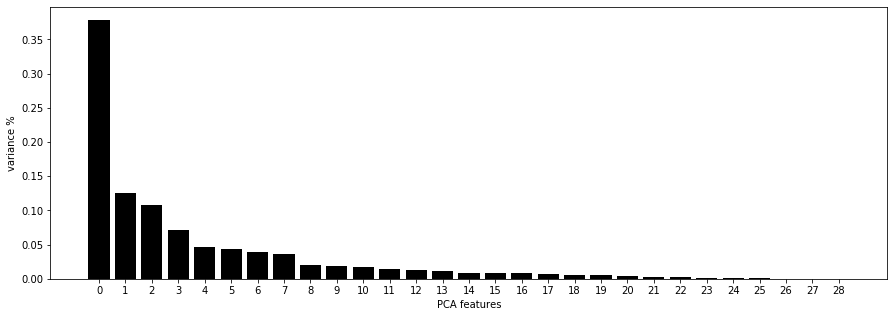

In [52]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)

# Create a PCA instance: pca
pca = PCA(n_components=len(df.columns))
principalComponents = pca.fit_transform(X_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.figure(figsize=(15,5))
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

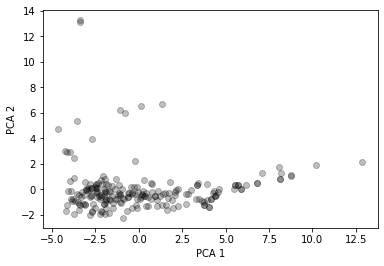

In [53]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

plt.scatter(PCA_components[0], PCA_components[1], alpha=.25, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

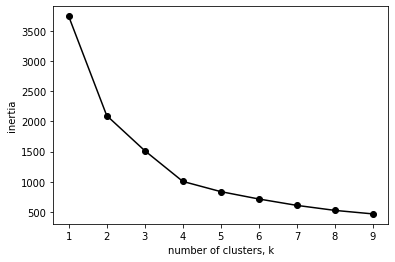

In [54]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

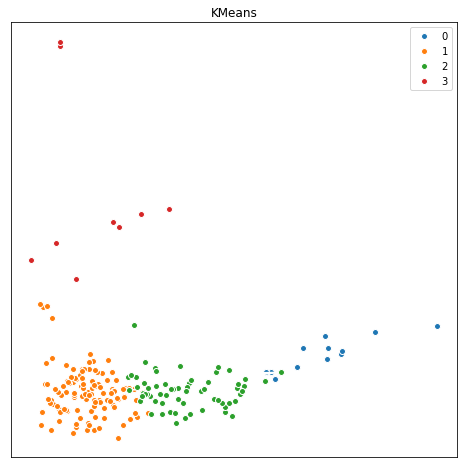

In [59]:
n_k = 4
model = KMeans(n_clusters = n_k)
X = PCA_components.iloc[:,:n_k-1]

model.fit(X)

model_centers = model.cluster_centers_

model_labels = pairwise_distances_argmin(X, model_centers)

model_labels

colors = ['C0','C1','C2','C3','C4','C5']

model_centers

len(model_labels)

fig = plt.figure(figsize=(8, 8),facecolor='w')
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(n_k),colors):
    my_members = model_labels == k
    cluster_center = model_labels[k]
    ax.plot(X[my_members][0], X[my_members][1], 'w',
            markerfacecolor=col, marker='o',label=k)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.legend()
plt.show()

passDF['k'] = model_labels

In [60]:
passDF[passDF['S'] == 22].sort_values('Rating',ascending=False)

,teamID,ACC,AGI,ARM,Att,Comp,END,G,HND,INT,Int,KAc,KDi,L,Lg,Name,OVR,PA,PBl,PF,Pct,Pos,RBl,Rating,S,SPE,STR,T,TCK,TD,Team,W,WPct,Yards,k
203,6,90,75,98,361,221,70,13,15,95,7,1,1,5,42,"Wright, D.",99,251,1,288,61.2,QB,1,95.2,22,75,46,0,15,21,SJS,8,0.615,2669,1
199,2,90,76,98,445,252,85,13,35,95,8,1,1,2,45,"Bigsby, C.",100,196,1,406,56.6,QB,1,93.6,22,75,70,0,15,29,YKW,11,0.846,3213,1
207,10,95,80,90,451,256,100,13,15,95,9,1,1,4,50,"Cole, E.",100,251,25,368,56.8,QB,25,90.7,22,79,80,1,15,26,AUS,8,0.654,3293,3
202,5,95,80,90,401,233,100,13,35,95,8,1,1,3,53,"Armstrong, F.",100,234,1,341,58.1,QB,1,86.7,22,79,80,0,15,17,OCO,10,0.769,2922,1
200,3,95,80,90,411,238,100,13,35,95,7,25,25,5,61,"McDummy, W.",100,208,25,295,57.9,QB,25,84.4,22,79,80,0,35,16,COL,8,0.615,2777,3
201,4,90,90,90,520,293,90,13,15,90,8,1,1,8,55,"Cue, J.",100,306,1,246,56.3,QB,1,79.7,22,90,60,1,15,15,AZ,4,0.346,3429,1
204,7,95,54,95,409,223,80,13,15,90,8,1,1,7,46,"Phoenix, B.",96,263,1,252,54.5,QB,1,76.7,22,60,50,0,15,15,PHI,6,0.462,2468,2
205,8,95,50,95,435,230,88,13,15,95,9,1,1,5,45,"Francisco, S.",98,257,1,269,52.9,QB,1,76.6,22,70,42,0,15,18,NO,8,0.615,2636,1
210,12,95,80,95,362,212,89,13,15,95,9,1,1,9,49,"Havran, C.",100,280,1,194,58.6,QB,1,75.2,22,75,70,0,15,8,HON,4,0.308,2374,2
198,1,90,45,88,371,204,51,13,15,91,7,1,1,10,40,"Fujiwara (R), C.",90,283,1,195,55.0,QB,1,70.4,22,66,43,0,15,9,BAL,3,0.231,1979,2


In [73]:
pk_list = [passDF[passDF['k'] == i].describe().loc['mean'] for i in range(n_k)]

In [74]:
pd.concat(pk_list,axis=1)

,mean,mean,mean,mean
teamID,4.882353,4.534483,5.362319,5.333333
ACC,71.941176,92.603448,85.695652,91.888889
AGI,49.411765,71.482759,57.260870,79.777778
ARM,72.705882,93.267241,83.463768,93.666667
Att,83.823529,538.784483,472.043478,463.222222
Comp,44.000000,314.810345,263.449275,258.333333
END,47.117647,79.758621,60.753623,91.111111
G,6.823529,13.603448,13.565217,13.222222
HND,15.000000,23.672414,16.217391,32.777778
INT,66.823529,93.224138,84.565217,90.333333
